In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

brock = pd.read_csv("data_brok.csv")
booth = pd.read_csv("data_booth.csv")
booth["fitness"][0]

5.664674474626608e-12

In [164]:
brock = booth
mode = "booth"

In [165]:
def graph_line(database, param, title):
    ax, fig = plt.subplots()
    plt.scatter(param, "epoch_stop", data=database)
    plt.xlabel("Epoch")
    plt.ylabel(param)
    plt.title(title)
    gence = "div"

    if database["fitness"].iloc[0] <= 1e-10:
        gence = "con"

    plt.savefig(f"figs/{param}_{mode}_{gence}")
    plt.show()


In [180]:
def heat_map(database, gence):
    ax, fig = plt.subplots()
    heatmap = plt.imshow(database, cmap='Blues')
    cbar = plt.colorbar(heatmap)
    cbar.ax.set_ylabel("epoch to convergence")
    plt.xlabel("Convergence")
    plt.ylabel("Social")
    plt.savefig(f"figs/heat_{mode}_{gence}")
    plt.show()

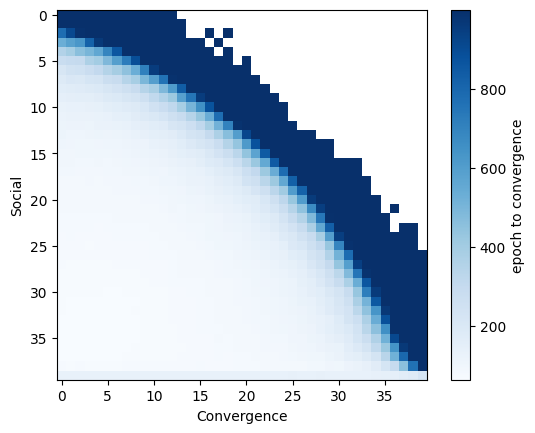

In [185]:
data_cognition_social = brock[(brock["inertia"] == 0.5) & (brock["num_particles"] == 40) & (brock["fitness"] <= 1e-10)]


heat_data = data_cognition_social.pivot_table(index='social', 
                          columns='cognition', 
                          values='epoch_stop', 
                          aggfunc='mean').sort_index(ascending=False)

heat_map(heat_data, "con")

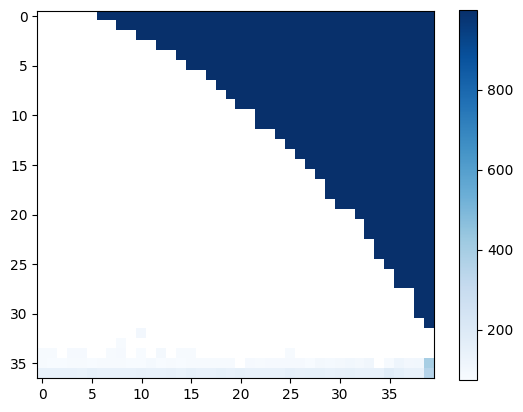

In [168]:
data_cognition_social = brock[(brock["inertia"] == 0.5) & (brock["num_particles"] == 40) & (brock["fitness"] > 1e-10)]


heat_data = data_cognition_social.pivot_table(index='social', 
                          columns='cognition', 
                          values='epoch_stop', 
                          aggfunc='mean').sort_index(ascending=False)

heat_map(heat_data, "div")

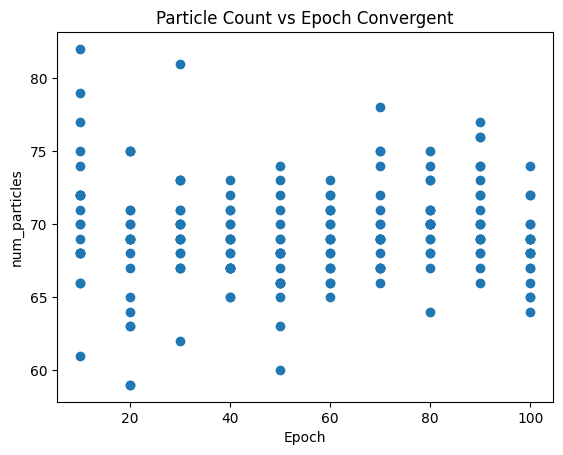

In [169]:
particles = brock[(brock["inertia"] == 0.5) & (brock["cognition"] == 1) & (brock["social"] == 1) & (brock["fitness"] <= 1e-10)]
graph_line(particles, "num_particles", "Particle Count vs Epoch Convergent")

In [170]:
particles = brock[(brock["inertia"] == 0.5) & (brock["cognition"] == 1) & (brock["social"] == 1) & (brock["fitness"] > 1e-10)]
if len(particles) > 0:
    graph_line(particles, "num_particles", "Particle Count vs Epoch Divergent")

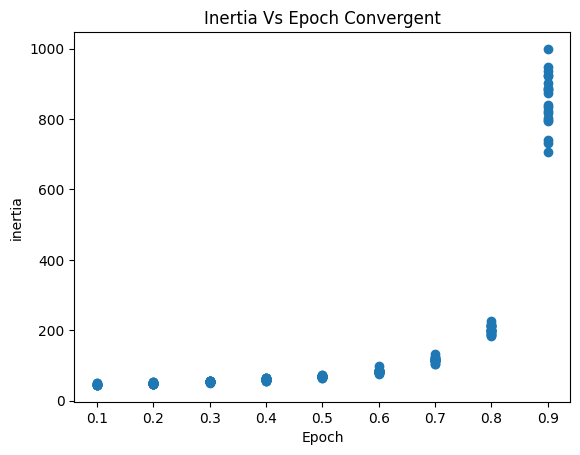

In [171]:
inertia = brock[(brock["num_particles"] == 40) & (brock["cognition"] == 1) & (brock["social"] == 1) & (brock["fitness"] <= 1e-10)]
graph_line(inertia, "inertia", "Inertia Vs Epoch Convergent")

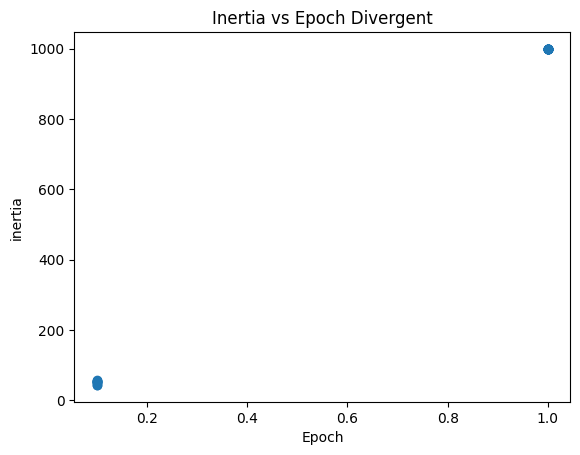

In [172]:
inertia = brock[(brock["num_particles"] == 40) & (brock["cognition"] == 1) & (brock["social"] == 1) & (brock["fitness"] > 1e-10)]
graph_line(inertia, "inertia", "Inertia vs Epoch Divergent")

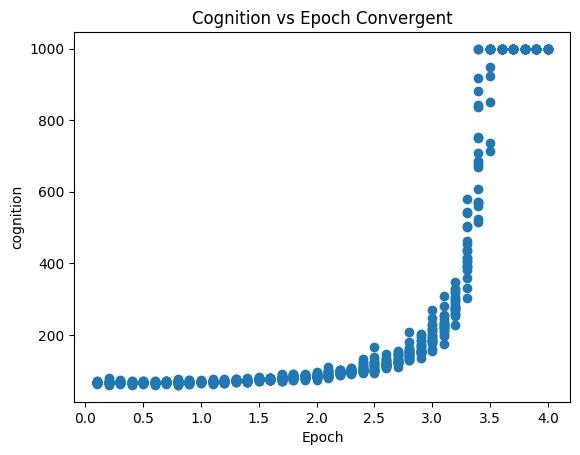

In [173]:
cognition = brock[(brock["num_particles"] == 40) & (brock["inertia"] == 0.5) & (brock["social"] == 1) & (brock["fitness"] <= 1e-10)]
graph_line(cognition, "cognition", "Cognition vs Epoch Convergent")

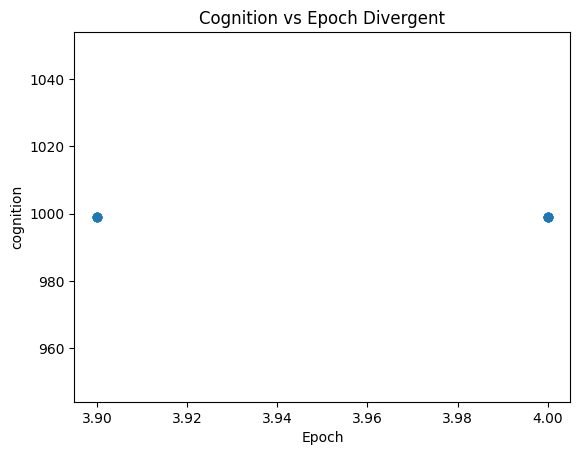

In [174]:
cognition = brock[(brock["num_particles"] == 40) & (brock["inertia"] == 0.5) & (brock["social"] == 1) & (brock["fitness"] > 1e-10)]
graph_line(cognition, "cognition", "Cognition vs Epoch Divergent")

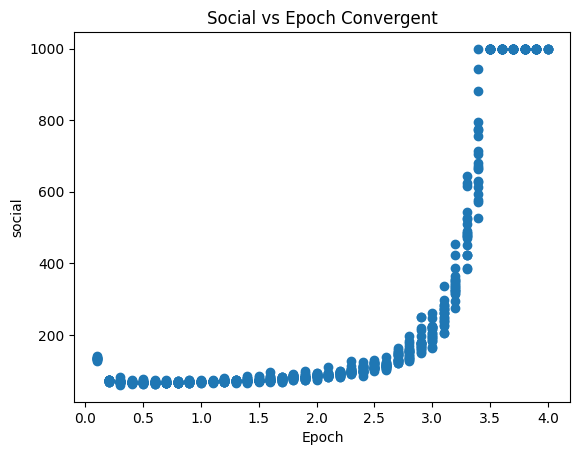

In [175]:
social = brock[(brock["num_particles"] == 40) & (brock["inertia"] == 0.5) & (brock["cognition"] == 1) & (brock["fitness"] <= 1e-10)]
graph_line(social, "social", "Social vs Epoch Convergent")

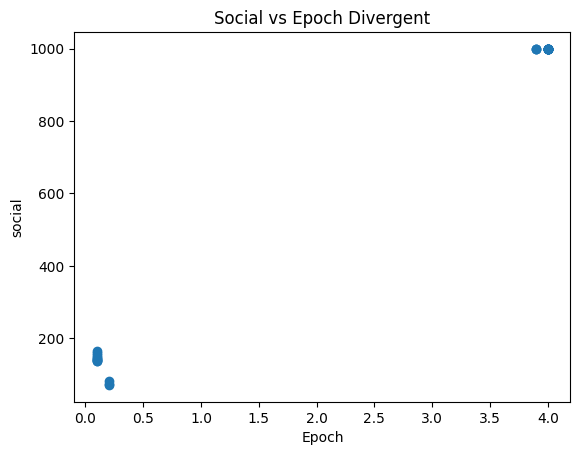

In [176]:
social = brock[(brock["num_particles"] == 40) & (brock["inertia"] == 0.5) & (brock["cognition"] == 1) & (brock["fitness"] > 1e-10)]
graph_line(social, "social", "Social vs Epoch Divergent")